## 2-3. 원하는 요소 가져오기 I - 책 이름 모으기

- 연습만이 살길! 예시 사이트를 통해 스크래핑을 진행해봅시다.

### Target: Mock Book Data

다음 사이트에 있는 책들의 이름 정보를 스크래핑 해봅시다 : http://books.toscrape.com/catalogue/category/books/travel_2/index.html  

해당 웹 페이지는 임의의 책 정보가 담긴 웹 사이트입니다.

원하는 태그에 정보가 필요할떄 태그가 얽히고 설켜서 복잡한 경우  
필요한 정보에 마우스를 대로 오른쪽 클릭해서 검사를 누르게 되면    
해당 정보가 html 태그에 어디에 있는지 알 수있다.

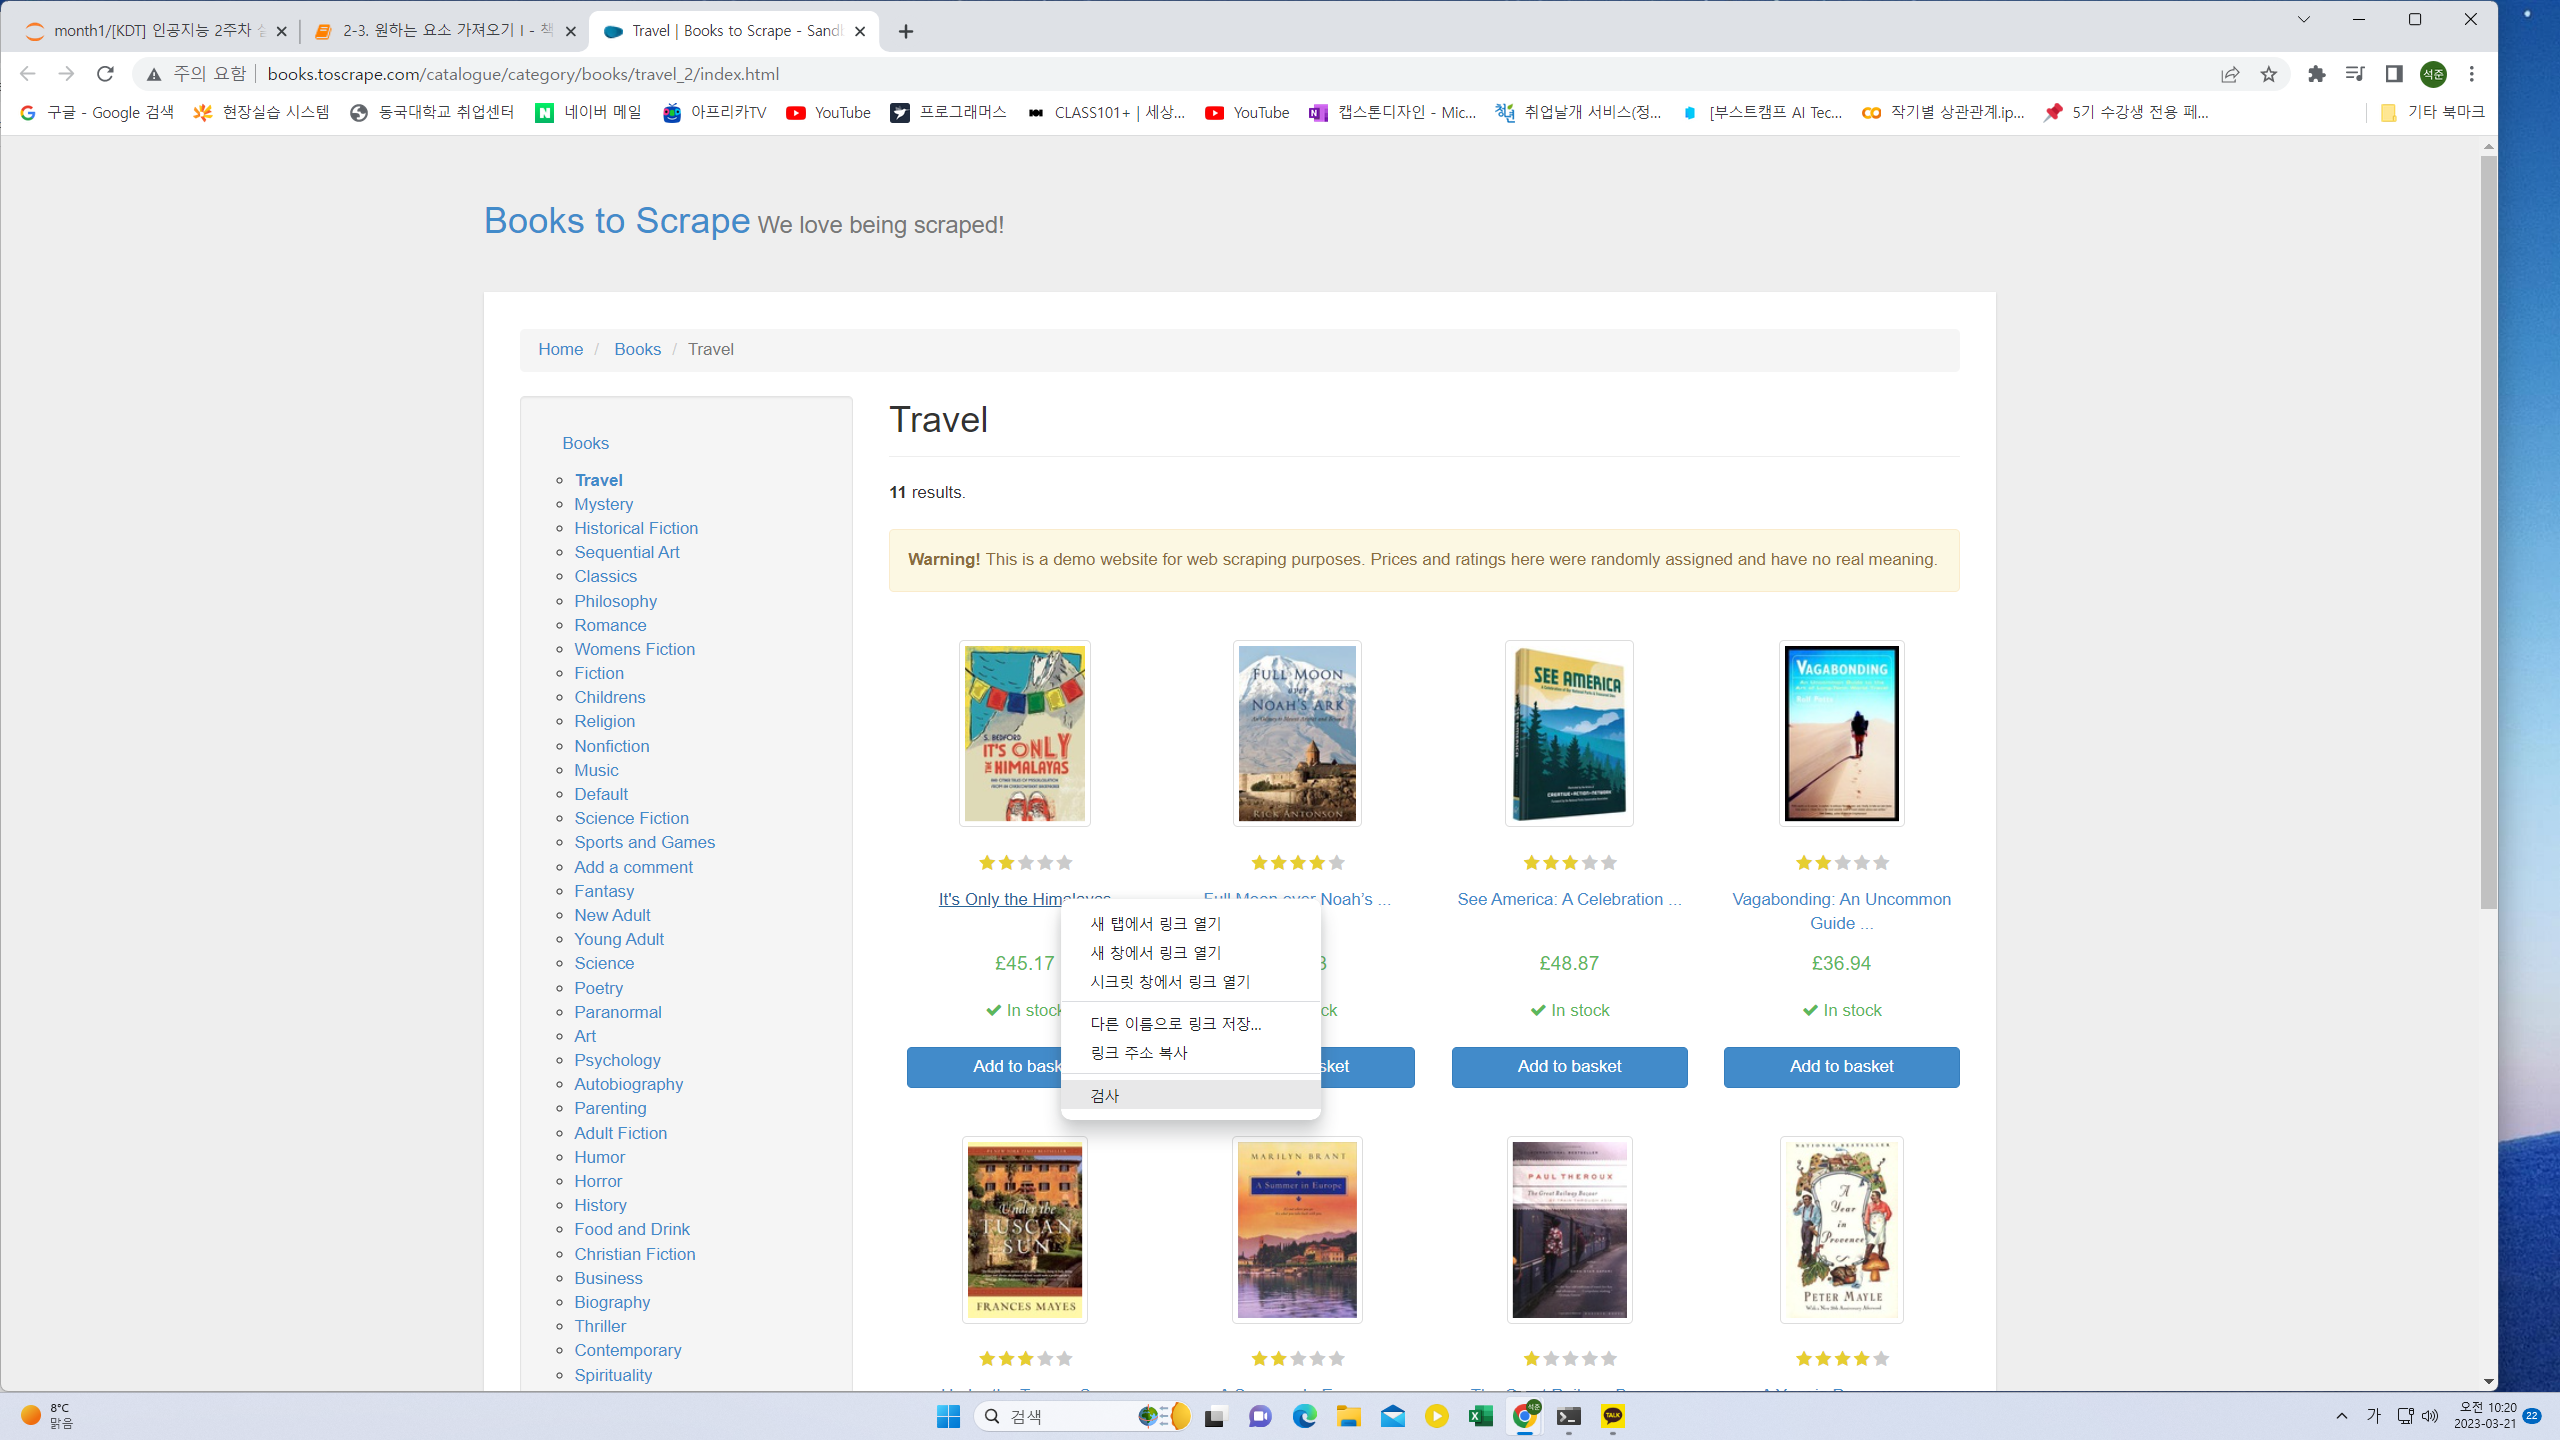
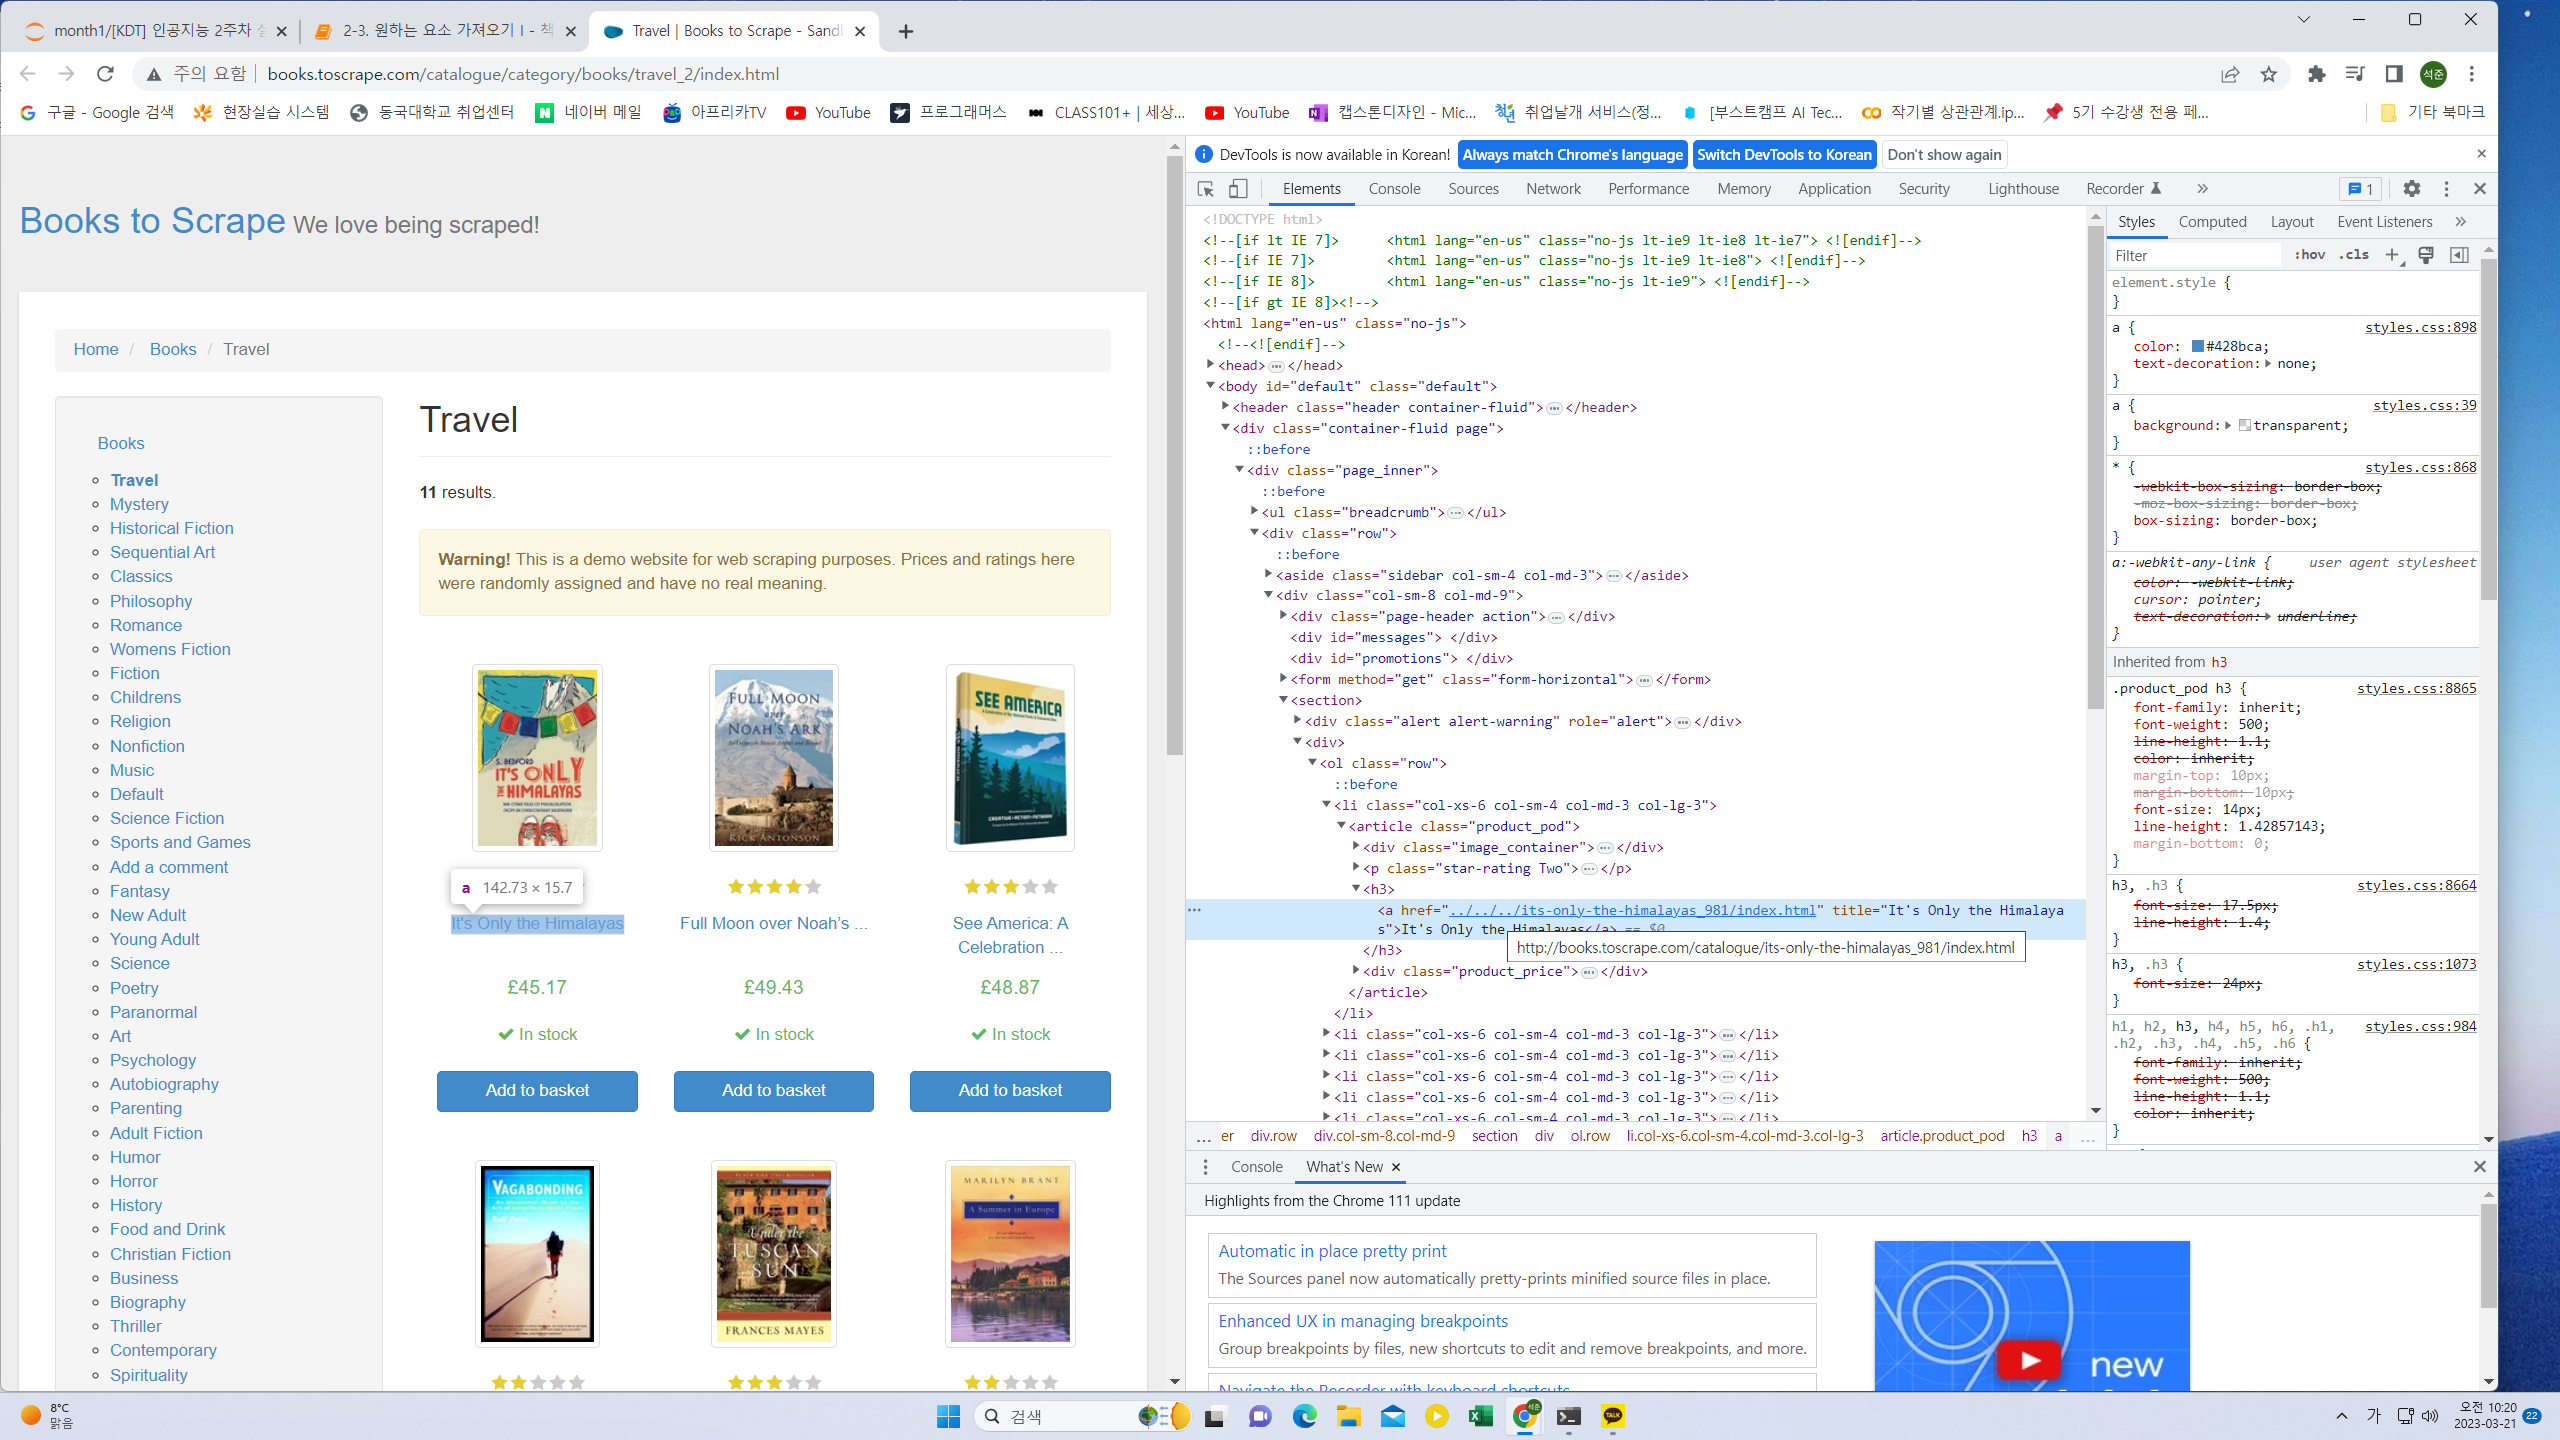

우리는 해당 웹페이지 에서 책의 제목만을 가져오려고 하고 이 정보를 살펴본 결과 h3태그에 책의 제목들이 전부 존재한다는 사실을 알 수있었다. 이 정보를 가지고 책의 제목들만 전부 가져와 보도록 하자!

In [4]:
# 스크래핑에 필요한 라이브러리를 불러와봅시다.

import requests
from bs4 import BeautifulSoup

In [6]:
# 예시 사이트에 요청을 진행하고, 응답을 바탕으로 BeautifulSoup 객체를 만들어봅시다.

res = requests.get("http://books.toscrape.com/catalogue/category/books/travel_2/index.html")

soup = BeautifulSoup(res.text, "html.parser")

In [33]:
# <h3> 태그에 해당하는 요소를 하나 찾아봅시다

book = soup.find("h3")
book

<h3><a href="../../../its-only-the-himalayas_981/index.html" title="It's Only the Himalayas">It's Only the Himalayas</a></h3>

In [75]:
# <h3> 태그에 해당하는 요소를 모두 찾아봅시다

h3_result = soup.find_all("h3")
len(h3_result)

11

In [69]:
type(h3_result)

bs4.element.ResultSet

In [76]:
h3_result

[<h3><a href="../../../its-only-the-himalayas_981/index.html" title="It's Only the Himalayas">It's Only the Himalayas</a></h3>,
 <h3><a href="../../../full-moon-over-noahs-ark-an-odyssey-to-mount-ararat-and-beyond_811/index.html" title="Full Moon over Noahâs Ark: An Odyssey to Mount Ararat and Beyond">Full Moon over Noahâs ...</a></h3>,
 <h3><a href="../../../see-america-a-celebration-of-our-national-parks-treasured-sites_732/index.html" title="See America: A Celebration of Our National Parks &amp; Treasured Sites">See America: A Celebration ...</a></h3>,
 <h3><a href="../../../vagabonding-an-uncommon-guide-to-the-art-of-long-term-world-travel_552/index.html" title="Vagabonding: An Uncommon Guide to the Art of Long-Term World Travel">Vagabonding: An Uncommon Guide ...</a></h3>,
 <h3><a href="../../../under-the-tuscan-sun_504/index.html" title="Under the Tuscan Sun">Under the Tuscan Sun</a></h3>,
 <h3><a href="../../../a-summer-in-europe_458/index.html" title="A Summer In Europe">A 

In [72]:
h3_result.find_all("a")

AttributeError: ResultSet object has no attribute 'find_all'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

위의 에러나 나오는 이유는 내 생각에는 처음에 html_parser로 res.text를 파싱한 후에 find나 find_all함수를 사용해서 나오는 값은 resultset이라는 값이 나오고 이 형태에서는 더이상 find나 find_all 메서드를 사용할 수없는거 같다!

찾아온 데이터들은 모두 **객체**이므로, 저희가 익숙한 방식대로 데이터를 추출할 수 있습니다.

In [37]:
# book_list에서 우리가 원하는 제목(title)만 추출해봅시다.
# 이렇게 만들어진 book는 객체이다 객체에서 할 수있는 것은 2가지인대
# 메서드를 호출하거나 안에 있는 속성을 참고하거나가 가능
# 그래서 h3태그 안에 있는 a태그를 h3태그의 attribute, 속성으로 쓸 수있다.
# 그래서 book.a로 쓰게 되면 a태그 부분이 h3의 속성으로 간주되서 활용할 수있다.
# 그래서 book.a.text를 하면 책이름이 나오게 된다!

book.a

<a href="../../../its-only-the-himalayas_981/index.html" title="It's Only the Himalayas">It's Only the Himalayas</a>

위의 태그를 잘 살펴보면 ```<a href...>text...</a>```이런식으로 구성 되어있다.
이 말은 a.text를 찍으면 ```<a href....>```의 ...부분이 출력되는 것이 아니라 
```<a href...>와</a>```사이의 text가 출력 되는 것을 알 수있다! 
그래서 <span style="color:red">text는 `<a href...>`와 `</a>`사이의 값이 text</span> 라는 사실을 알 수있다

In [63]:
for k in h3_result:
    print(k.a.text)

It's Only the Himalayas
Full Moon over Noahâs ...
See America: A Celebration ...
Vagabonding: An Uncommon Guide ...
Under the Tuscan Sun
A Summer In Europe
The Great Railway Bazaar
A Year in Provence ...
The Road to Little ...
Neither Here nor There: ...
1,000 Places to See ...


실행시켜보면 제대로 나오지 않고 ...으로 나오는 경우가 존재한다 따라서 우리는 text가 아니라 a태그의 속성인 title속성을 봐야한다. 근대 이 속성을 접근하는 방법은 dict처럼 접근한다고 한다!
따라서 a["title"]의 형태로 접근을 해야한다!

In [64]:
for k in h3_result:
    print(k.a["title"])

It's Only the Himalayas
Full Moon over Noahâs Ark: An Odyssey to Mount Ararat and Beyond
See America: A Celebration of Our National Parks & Treasured Sites
Vagabonding: An Uncommon Guide to the Art of Long-Term World Travel
Under the Tuscan Sun
A Summer In Europe
The Great Railway Bazaar
A Year in Provence (Provence #1)
The Road to Little Dribbling: Adventures of an American in Britain (Notes From a Small Island #2)
Neither Here nor There: Travels in Europe
1,000 Places to See Before You Die


In [65]:
k = [i.a["title"] for i in (h3_result)]
k

["It's Only the Himalayas",
 'Full Moon over Noahâ\x80\x99s Ark: An Odyssey to Mount Ararat and Beyond',
 'See America: A Celebration of Our National Parks & Treasured Sites',
 'Vagabonding: An Uncommon Guide to the Art of Long-Term World Travel',
 'Under the Tuscan Sun',
 'A Summer In Europe',
 'The Great Railway Bazaar',
 'A Year in Provence (Provence #1)',
 'The Road to Little Dribbling: Adventures of an American in Britain (Notes From a Small Island #2)',
 'Neither Here nor There: Travels in Europe',
 '1,000 Places to See Before You Die']